# Explore the MESA models from [Zsolt et al. (2022)](https://academic.oup.com/mnras/article/517/2/2028/6701644?login=false)

*Victor Ramirez Delgado*

The models take into account the effects of fossil magnetic fields in the evoluation of massive stars. Our grid of models covers several values for the initial value of the magentic field $B_0$ of our stars randing from no magneic field to 50,000 Gauss. For each of these values of $B_0$ we also differentiate the models based on the star's initial mass ranging from $3$ to $60 M_\odot$. Lastly, the models are also separted into differen categories based on their metallicities, magnetic breaking scheme and chemical mixing schemes (see the full paper for more information). This is notebook aims to explore the models that have solar metallicity, solid-body rotation, and chemical mixing type I (hereby the name of the notebook for Z14 being the solar metallicity and mix 1 for the mixing type).

In [1]:
#imports
import matplotlib.pyplot as plt
from matplotlib import cm
import random
import numpy as np
import pandas as pd
#make better plots
plt.style.use(['science','notebook','grid'])
plt.rcParams.update({"font.size" : 26})
plt.rcParams.update({"axes.labelsize" : 24})
plt.rcParams.update({"xtick.labelsize" : 22})
plt.rcParams.update({"ytick.labelsize" : 22})
plt.rcParams.update({"axes.titlesize" : 26})
plt.rcParams.update({"figure.figsize": (9,6)})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
# read MESA files 
def read_track(file):
    data = np.genfromtxt( file, skip_header=5, names=True)
    return (data)

def read_track_small(file):
    col  = [1,2,6,11,12,54,75,84]
    data = np.genfromtxt( file, skip_header=5, usecols=col, names=True)
    return (data)

## Observe a model for a $10M_\odot$ star with a field of $B_0 = 1000 ~\mathrm{G}$ 

In [26]:
#open a single .dat file
path  = 'Z14Mix1/1000/10.0/'
file = read_track(path+'out.data')
#print the column names
a = file.dtype
for i, item in enumerate(a.names):
    print(i, item)

0 model_number
1 star_age
2 star_mass
3 star_mdot
4 num_zones
5 log_total_angular_momentum
6 log_Teff
7 effective_T
8 photosphere_L
9 photosphere_r
10 luminosity
11 log_L
12 log_R
13 radius
14 log_g
15 log_Ledd
16 log_L_div_Ledd
17 surface_optical_depth
18 surf_avg_j_rot
19 surf_avg_omega
20 surf_avg_omega_div_omega_crit
21 surf_avg_omega_crit
22 surf_avg_v_rot
23 surf_avg_v_crit
24 surf_escape_v
25 rotational_mdot_boost
26 surf_r_equatorial_div_r_polar
27 cz_top_mass
28 cz_top_radius
29 cz_top_omega
30 he_core_mass
31 he_core_radius
32 he_core_omega
33 c_core_mass
34 c_core_radius
35 c_core_omega
36 log_Lnuc
37 mass_conv_core
38 conv_mx1_top
39 conv_mx1_bot
40 conv_mx2_top
41 conv_mx2_bot
42 mx1_top
43 mx1_bot
44 mx2_top
45 mx2_bot
46 epsnuc_M_1
47 epsnuc_M_2
48 epsnuc_M_3
49 epsnuc_M_4
50 epsnuc_M_5
51 epsnuc_M_6
52 epsnuc_M_7
53 epsnuc_M_8
54 log_center_T
55 log_center_Rho
56 log_center_P
57 center_mu
58 center_omega
59 center_h1
60 center_he4
61 center_c12
62 center_n14
63 center_o

We are interested in observing the evolution of Beq (B field), surf_avg_v_rot (surface rotational speed), log_R (radius) and angular momentum (angular momentum at the surface).

In [27]:
#convert to pandas data frame
data = pd.DataFrame(file)

Text(0, 0.5, 'Mean surface rotation speed (km/s)')

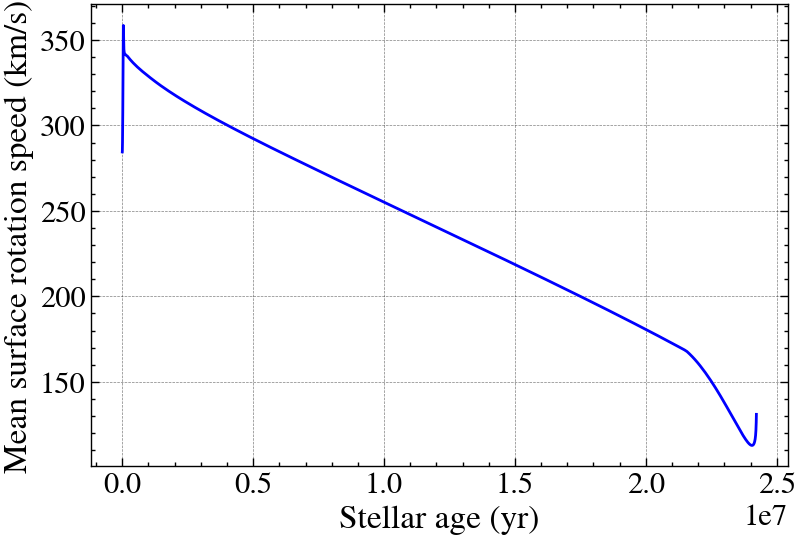

In [28]:
#plot the rotation as function of age
plt.plot(data['star_age'],data['surf_avg_v_rot'], color = 'b')
plt.xlabel('Stellar age (yr)')
plt.ylabel('Mean surface rotation speed (km/s)')

Text(0, 0.5, 'B (G)')

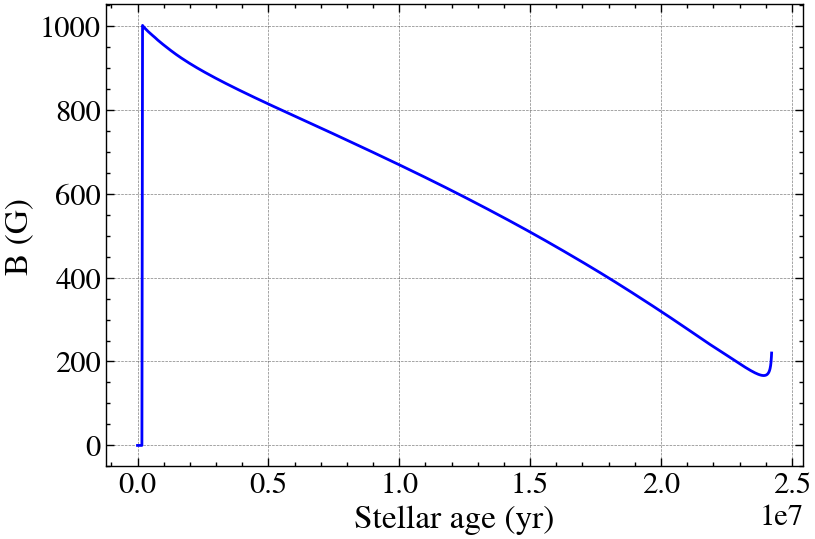

In [29]:
#Beq as a function of stellar age
plt.plot(data['star_age'],data['Beq'], color = 'b')
plt.xlabel('Stellar age (yr)')
plt.ylabel('B (G)')

Text(0, 0.5, '$R_\\star/R_\\odot$')

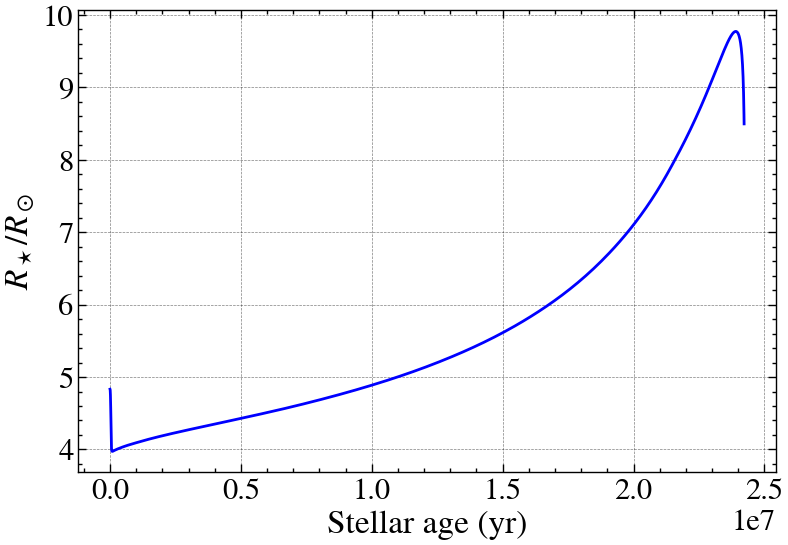

In [30]:
#radius
plt.plot(data['star_age'],10**data['log_R'], color = 'b')
plt.xlabel('Stellar age (yr)')
plt.ylabel(r'$R_\star/R_\odot$')

Text(0, 0.5, 'Mean surface $\\Omega$')

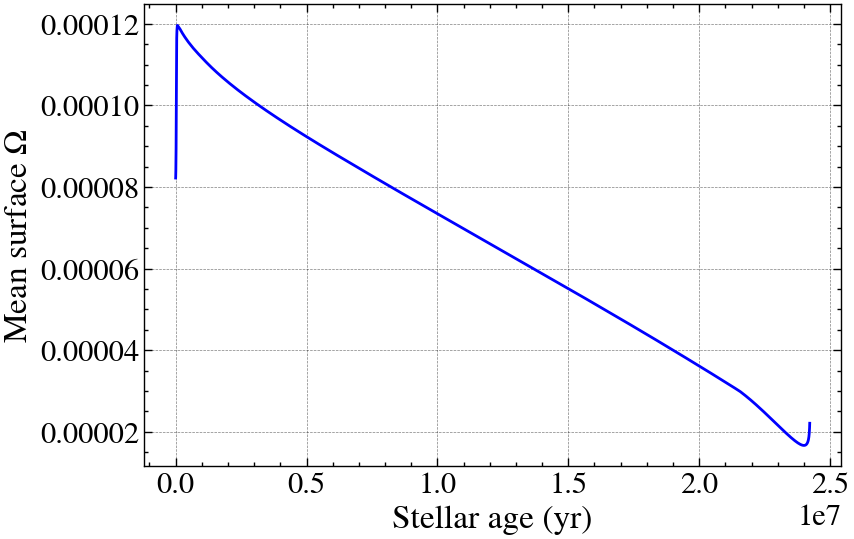

In [31]:
#angular momentum
plt.plot(data['star_age'],data['surf_avg_omega'], color = 'b')
plt.xlabel('Stellar age (yr)')
plt.ylabel('Mean surface $\Omega$')

We would like to remove the relaxation time of our models so that we can avoid the discontinuities at the beginning of the simulation. To observe this, let's plot the HR diagram for our model and see how it changes

(4.4, 4.29)

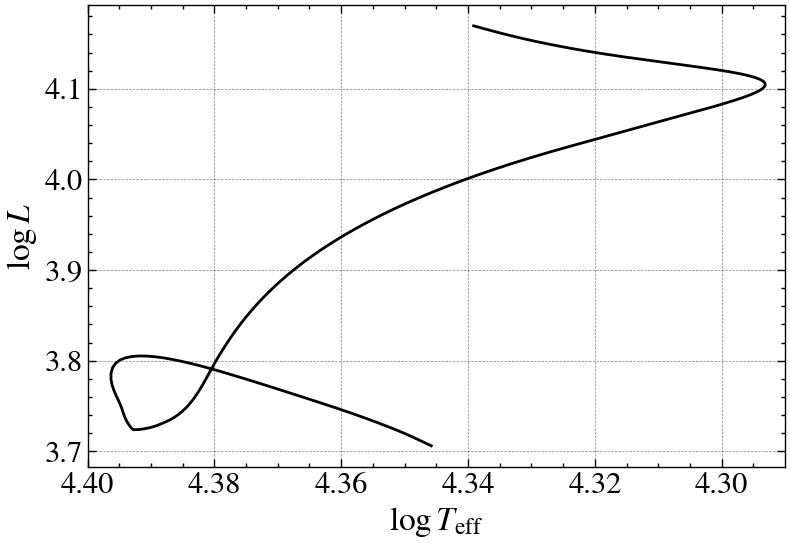

In [32]:
#HR diagram
plt.plot(data['log_Teff'],data['log_L'], color ='k')
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel(r'$\log L$')
plt.xlim(4.40,4.29)

## Remove the relaxation time

Find the time at which the Hydrogen abundance drops by 0.3% and set it as the Zero Age Main Sequence (ZAMS)

In [33]:
#find initial abundance
h_0 = np.max(data['center_h1'])
#find the zero age main squence
h_zams = h_0- h_0*0.3/100
print(h_zams, h_0)

0.717834950730978 0.7199949355375908


In [34]:
data = data[data['center_h1']<= h_zams]

(4.4, 4.29)

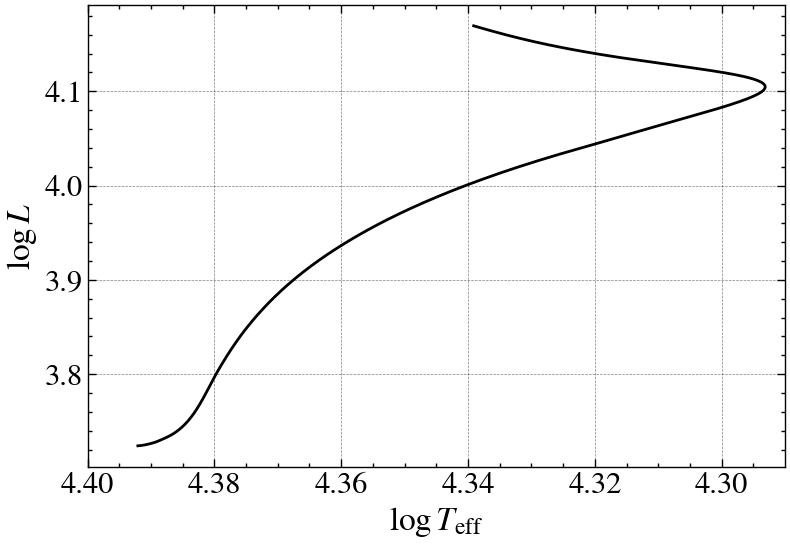

In [35]:
plt.plot(data['log_Teff'],data['log_L'], color = 'k')
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel(r'$\log L$')
plt.xlim(4.40,4.29)

Now that we can remove the relaxation time we will apply the same procedure later on for our experiments when we want to observe the evoluation of the HR diagram

## Check the ZAMS for models of the smaller mass

Now we will repeat the procedure done before for a $3M_\odot$ model with $B_0 = 1000\mathrm{G}$

In [36]:
#open a single .dat file
path  = 'Z14Mix1/1000/3.0/'
file = read_track(path+'out.data')
#print the column names
a = file.dtype
#for i, item in enumerate(a.names):
#    print(i, item)

In [37]:
m3 = pd.DataFrame(file)

In [38]:
h0_m3 = np.max(m3['center_h1'])
hzams_m3 = h0_m3 - h0_m3 *0.3/100
m3 = m3[ m3['center_h1']<= hzams_m3]

In [39]:
print('age in years:{:.3e}'.format(np.min(m3['star_age'])))

age in years:2.652e+06


Text(0, 0.5, '$\\log L$')

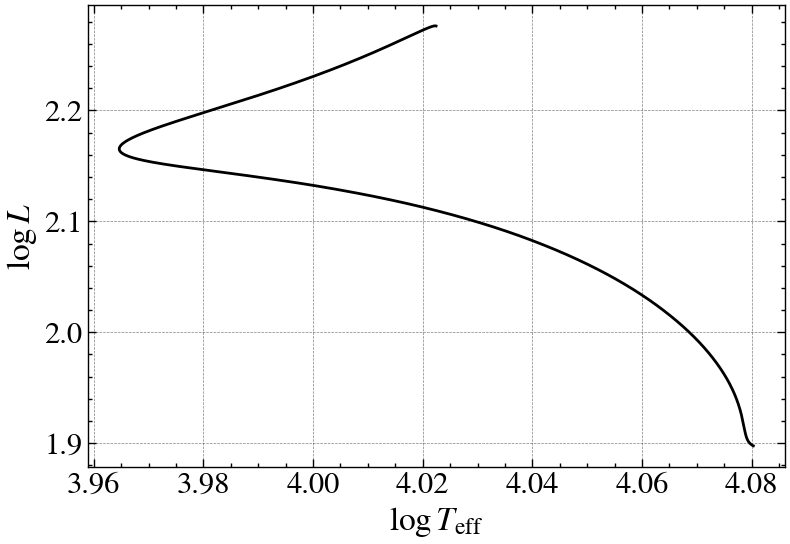

In [40]:
plt.plot(m3['log_Teff'],m3['log_L'], color = 'k')
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel(r'$\log L$')

Similar result as before

## Plot HR-Diagram for different models

Now let's plot the HR diagram and color code with the value of the magnetic field. These will allow us to observe how the field decreases as stars evolve.

In [41]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#function to color plot the lines
def plot_colourline(x,y,c):
    col = cm.jet((c-np.min(c))/(np.max(c)-np.min(c)))
    ax = plt.gca()
    for i in np.arange(len(x)-1):
        ax.plot([x[i],x[i+1]], [y[i],y[i+1]], c=col[i])
    im = ax.scatter(x, y, c=c, s=0, cmap=cm.jet)
    return im

The following cell plots the HR digrama for all of the initial mass models that have a value of $B_0 = 1000\mathrm{G}$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


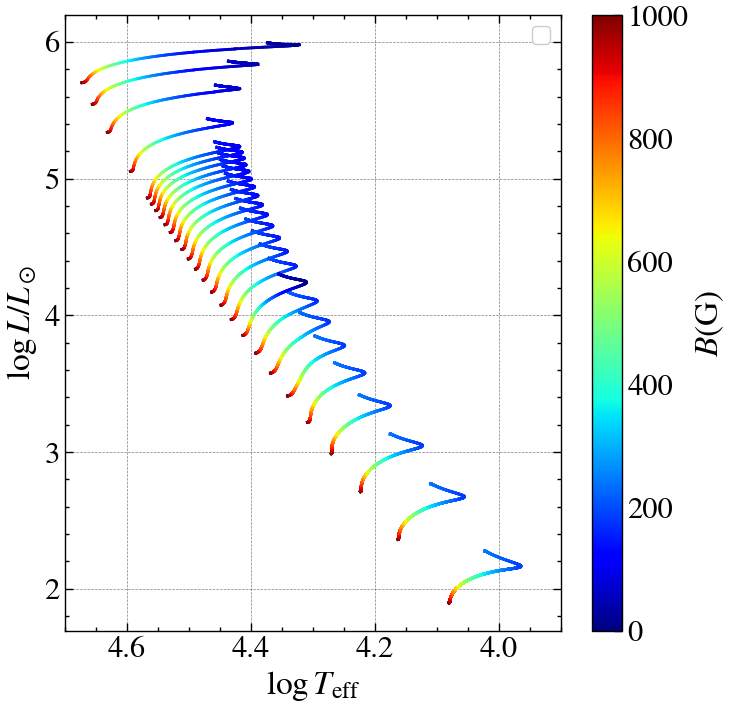

In [44]:
#first plot over a single magnetic field of 1000G
import os
path = 'Z14Mix1/1000'
cmap = plt.cm.plasma
plt.figure(figsize = (8,8))
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    f = read_track(f+'/out.data')
    f = pd.DataFrame(f)
    h0 = np.max(f['center_h1'])
    hzams = h0 - h0*0.3/100
    f['center_h1']<= hzams
    f = (f[ f['center_h1']<= hzams]).reset_index(drop=True)
    im = plot_colourline(f['log_Teff'], f['log_L'],f['Beq'])
    
plt.colorbar(im, label=r'$B (\mathrm{G})$')
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.xlim(4.7,3.9)
plt.ylabel(r'$\log L/L_\odot$')
plt.legend(ncol=4)

We can also observe how the rotational speed decreases due to the effects of magnetic breaking

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


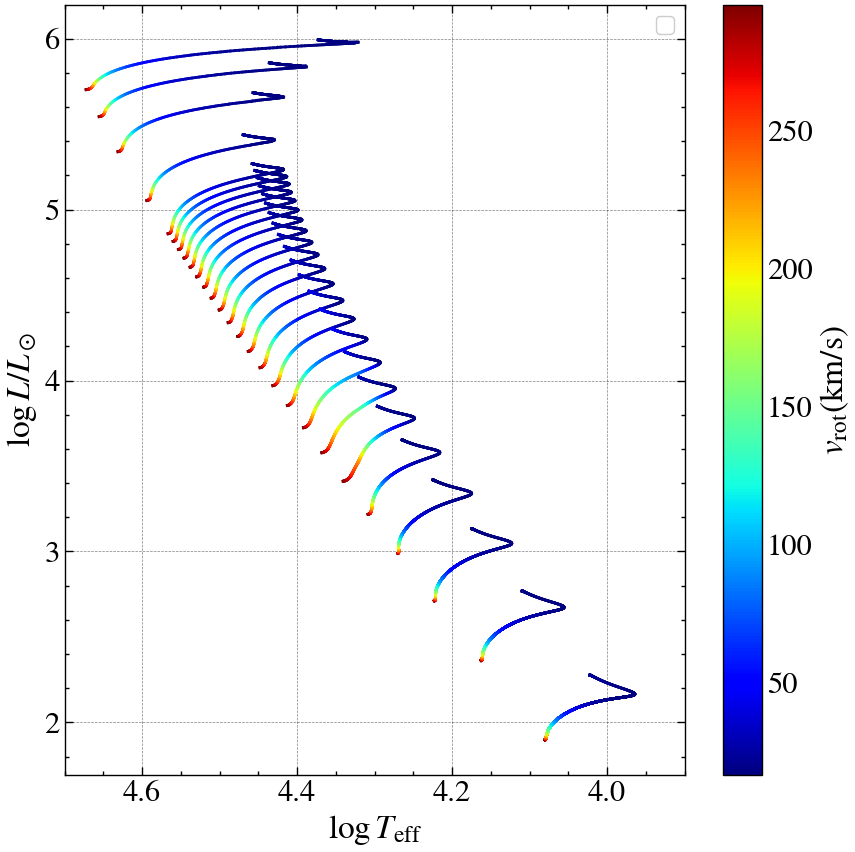

In [48]:
#color code with the value of the rotation
import os
path = 'Z14Mix1/1000'
cmap = plt.cm.plasma
plt.figure(figsize = (10,10))
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    f = read_track(f+'/out.data')
    f = pd.DataFrame(f)
    h0 = np.max(f['center_h1'])
    hzams = h0 - h0*0.3/100
    f['center_h1']<= hzams
    f = (f[ f['center_h1']<= hzams]).reset_index(drop=True)
    im = plot_colourline(f['log_Teff'], f['log_L'],f['surf_avg_v_rot'])
    
plt.colorbar(im, label=r'$v_\mathrm{rot} (\mathrm{km/s})$')
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.xlim(4.7,3.9)
plt.ylabel(r'$\log L/L_\odot$')
plt.legend(ncol=4)

## Find the Terminal Age Main Squence (TAMS) 

age in years:3.574e+08


Text(0, 0.5, '$\\log L$')

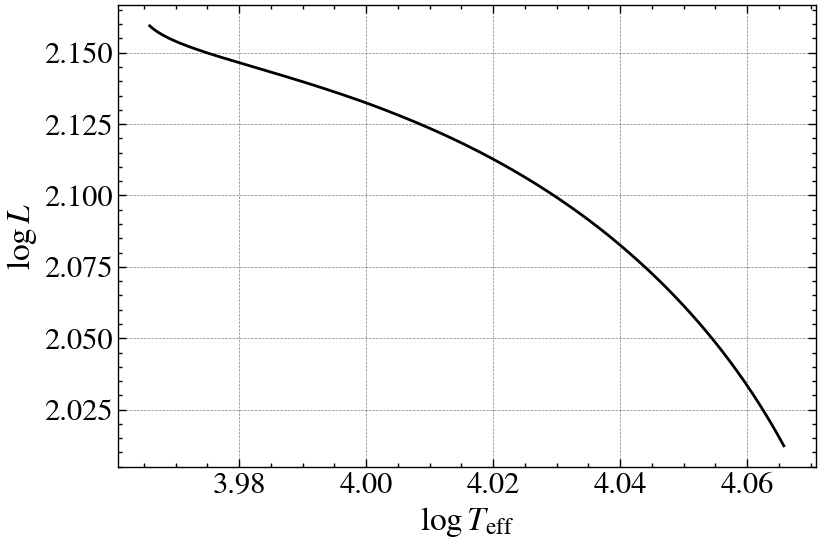

In [49]:
#use the model I used previosuly of the 3 solar mass to find the cutt off
m3 = pd.DataFrame(file)
h0_m3 = np.max(m3['center_h1'])
hzams_m3 = h0_m3 - h0_m3 *0.3
m3 = m3[ m3['center_h1']<= hzams_m3]
htams_m3 = 0.05
m3 = m3[ m3['center_h1']>= htams_m3]
print('age in years:{:.3e}'.format(np.max(m3['star_age'])))
plt.plot(m3['log_Teff'],m3['log_L'], color = 'k')
plt.xlabel(r'$\log T_\mathrm{eff}$')
plt.ylabel(r'$\log L$')

Take the moment where the star does the main sequence turn off when the fraction of nuclear Hydrogen reaches 5%